In [37]:
import os
import random
import numpy as np
import pandas as pd
import data_utils

In [38]:
ROOT = '/home/Afshin/cs231n/cs231n-project/yelp-data'

Minimum number of photos = 2
Mean number of photos = 117.421000
Maximum number of photos = 2974
Number of businesses after filtering = 1803


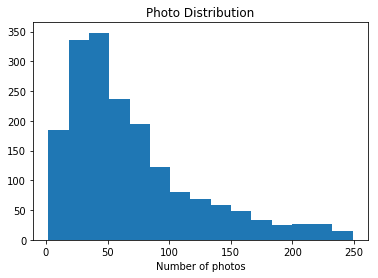

In [39]:
photo_biz_map = pd.read_csv(os.path.join(ROOT, 'train_photo_to_biz_ids.csv' ), encoding='utf8', error_bad_lines=False)
group_count = photo_biz_map.groupby('business_id').agg(['count']).values

print('Minimum number of photos = %d' % int(np.min(group_count)))
print('Mean number of photos = %f' % np.mean(group_count))
print('Maximum number of photos = %d' % int(np.max(group_count)))

group_count_filtered = group_count[[group_count < 250]]
print('Number of businesses after filtering = %d' % len(group_count_filtered))
data_utils.plot_bin(group_count_filtered, 'Number of photos',
         'Photo Distribution', os.path.join(ROOT, 'figures', 'biz_photo_dist.png'), bins=15)

Total Number of businesses = 2000
Number of businesses with at least one label = 1996
Number of businesses per label =  [ 671.  993. 1026. 1003.  547. 1249. 1360.  572. 1238.]
Total Number of Training Labels =  8659.0


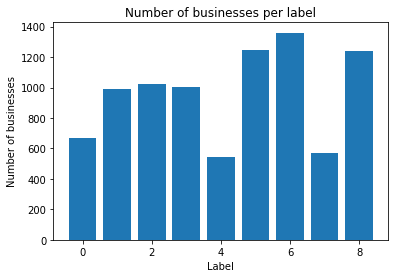

Label Probability =  [0.3355 0.4965 0.513  0.5015 0.2735 0.6245 0.68   0.286  0.619 ]


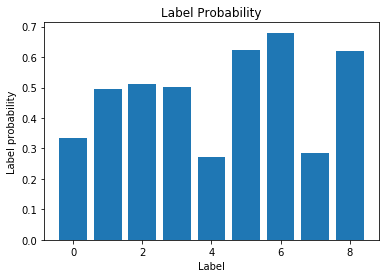

In [42]:
biz_label_map = pd.read_csv(os.path.join(ROOT, 'train.csv'),
                            encoding='utf8', error_bad_lines=False)
biz_num = biz_label_map.shape[0]
print('Total Number of businesses = %d' % biz_label_map.shape[0])
biz_label_map = biz_label_map.dropna()
print('Number of businesses with at least one label = %d' % biz_label_map.shape[0])
a = np.zeros(9)
for index, row in biz_label_map.iterrows():
    labels = str(row['labels']).split()
    for label in labels:
        a[int(label)] += 1

print('Number of businesses per label = ', a)
print('Total Number of Training Labels = ', sum(a))


data_utils.plot_bar([i for i in range(9)], a.tolist(), 'Label', 'Number of businesses',
     'Number of businesses per label', os.path.join(ROOT, 'figures', 'biz_label_count.png'))

a_prob = a / biz_num
print('Label Probability = ', a_prob)
data_utils.plot_bar([i for i in range(9)], a_prob.tolist(), 'Label', 'Label probability',
     'Label Probability', os.path.join(ROOT, 'figures', 'label_prob.png'))